# Real Estate Forecast

This is the notebook for the first competition I joined

Leaderboard position: 32/51

Plenty of room to improve upon new concepts learned after competition end

The objective of this competition is to create an automatic learning model that allows predicting the price of apartments for Argentina and Colombia given the main variables that describe these properties, such as: the area, the number of bathrooms, the location, etc.

Evaluation

The evaluation of the model will be done using the RMSLE (Root Mean Squared Logarithmic Error)
This metric is used so as not to penalize the difference in price from an expensive apartment to one of lesser value. 

Developed under concepts learned from:

- Python Crash Course: A Hands-On, Project-Based Introduction to Programming. Matthes, Eric
- Python Data Science Handbook - 2017. VanderPlas J.
- Hands-On Machine Learning with Scikit-Learn, Keras, and Tensorflow Concepts, Tools, and Techniques to Build Intelligent Systems by Aurélien Géron

- Data Camp Courses
- Kaggle Courses and notebooks from other competitions
- Blogs and social media

In [11]:
#Librerias para el analisis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
train_path = 'C:\\Users\\desar\\OneDrive\\Escritorio\\data_science\\Competencia Predicciones depto argentina y colombia\\train_set_deptos.csv'
test_path = 'C:\\Users\\desar\\OneDrive\\Escritorio\\data_science\\Competencia Predicciones depto argentina y colombia\\test_set_deptos.csv'
train_set = pd.read_csv(train_path, index_col = 'Id')
test_set = pd.read_csv(test_path, index_col = 'Id')

# Exploro los datos

In [13]:
train_set.head(10)

,pais,provincia_departamento,ciudad,property_type,operation_type,rooms,bedrooms,bathrooms,surface_total,currency,price
Id,,,,,,,,,,,
0,Argentina,Capital Federal,Villa Crespo,Departamento,Venta,2.0,1.0,1.0,37.0,USD,85000.0
1,Argentina,Capital Federal,Palermo,Departamento,Venta,6.0,4.0,4.0,300.0,USD,1590000.0
2,Colombia,Atlántico,Barranquilla,Apartamento,Venta,3.0,3.0,3.0,95.0,USD,85329.0
3,Colombia,Valle del Cauca,Cali,Apartamento,Venta,3.0,3.0,1.0,60.0,USD,22846.0
4,Argentina,Capital Federal,Balvanera,Departamento,Venta,3.0,2.0,1.0,45.0,USD,80000.0
5,Colombia,Santander,Floridablanca,Apartamento,Venta,3.0,3.0,2.0,75.0,USD,60556.0
6,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,Departamento,Venta,3.0,2.0,1.0,87.0,USD,139000.0
7,Argentina,Capital Federal,Villa Crespo,Departamento,Venta,4.0,3.0,1.0,100.0,USD,174500.0
8,Colombia,Cundinamarca,Bogotá D.C,Apartamento,Venta,3.0,3.0,2.0,93.0,USD,115607.0


In [14]:
train_set.describe()

,rooms,bedrooms,bathrooms,surface_total,price
count,25660.000000,25660.000000,25660.000000,25660.000000,2.566000e+04
mean,2.648207,1.989751,1.682502,78.966875,1.656802e+05
std,1.022895,0.937260,0.895758,53.229903,2.244543e+05
min,1.000000,1.000000,1.000000,10.000000,6.009000e+03
25%,2.000000,1.000000,1.000000,43.000000,7.100000e+04
50%,3.000000,2.000000,1.000000,63.000000,1.050000e+05
75%,3.000000,3.000000,2.000000,94.000000,1.700000e+05
max,12.000000,7.000000,6.000000,347.000000,3.450000e+06


In [15]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25660 entries, 0 to 25659
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pais                    25660 non-null  object 
 1   provincia_departamento  25660 non-null  object 
 2   ciudad                  25660 non-null  object 
 3   property_type           25660 non-null  object 
 4   operation_type          25660 non-null  object 
 5   rooms                   25660 non-null  float64
 6   bedrooms                25660 non-null  float64
 7   bathrooms               25660 non-null  float64
 8   surface_total           25660 non-null  float64
 9   currency                25660 non-null  object 
 10  price                   25660 non-null  float64
dtypes: float64(5), object(6)
memory usage: 2.3+ MB


En el train set hay 25660 datos, sin NaNs 
con 6 categorical variables y el resto numericas

In [16]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6416 entries, 25660 to 32075
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   pais                    6416 non-null   object 
 1   provincia_departamento  6416 non-null   object 
 2   ciudad                  6416 non-null   object 
 3   property_type           6416 non-null   object 
 4   operation_type          6416 non-null   object 
 5   rooms                   6416 non-null   float64
 6   bedrooms                6416 non-null   float64
 7   bathrooms               6416 non-null   float64
 8   surface_total           6416 non-null   float64
 9   currency                6416 non-null   object 
dtypes: float64(4), object(6)
memory usage: 551.4+ KB


Todo ok en el test set, mismas features sin NaNs

In [17]:
train_set['property_type'].value_counts()

Departamento    16892
Apartamento      8768
Name: property_type, dtype: int64

Cual es la diferencia entre uno y otro? Abajo vemos que los departamentos son mas caros

In [18]:
train_set[['property_type', 'price']].groupby(['property_type']).mean()

,price
property_type,
Apartamento,130873.891309
Departamento,183746.825302


Qué pais es mas caro? abajo vemos que argentina tiene precios promedio mas altos

In [19]:
train_set[['pais', 'price']].groupby(['pais']).mean()

,price
pais,
Argentina,183746.825302
Colombia,130873.891309


los precios medios son los mismos para pais y para property type, osea que 
en colombia se dice apartamento y en arg se dice depto..
esa columna la podemos eliminar

aparentemente currency es solo USD, verificamos y si es asi es como para eliminar esa columna

In [20]:
train_set['currency'].value_counts()

USD    25660
Name: currency, dtype: int64

y con operation type lo mismo

In [21]:
train_set['operation_type'].value_counts()

Venta    25660
Name: operation_type, dtype: int64

In [22]:
#dropeamos las columnas mencionadas
cols_to_drop = ['operation_type', 'currency', 'property_type']
train_set.drop(cols_to_drop, axis = 1, inplace = True)
test_set.drop(cols_to_drop, axis = 1, inplace = True)
train_set.head()

,pais,provincia_departamento,ciudad,rooms,bedrooms,bathrooms,surface_total,price
Id,,,,,,,,
0,Argentina,Capital Federal,Villa Crespo,2.0,1.0,1.0,37.0,85000.0
1,Argentina,Capital Federal,Palermo,6.0,4.0,4.0,300.0,1590000.0
2,Colombia,Atlántico,Barranquilla,3.0,3.0,3.0,95.0,85329.0
3,Colombia,Valle del Cauca,Cali,3.0,3.0,1.0,60.0,22846.0
4,Argentina,Capital Federal,Balvanera,3.0,2.0,1.0,45.0,80000.0


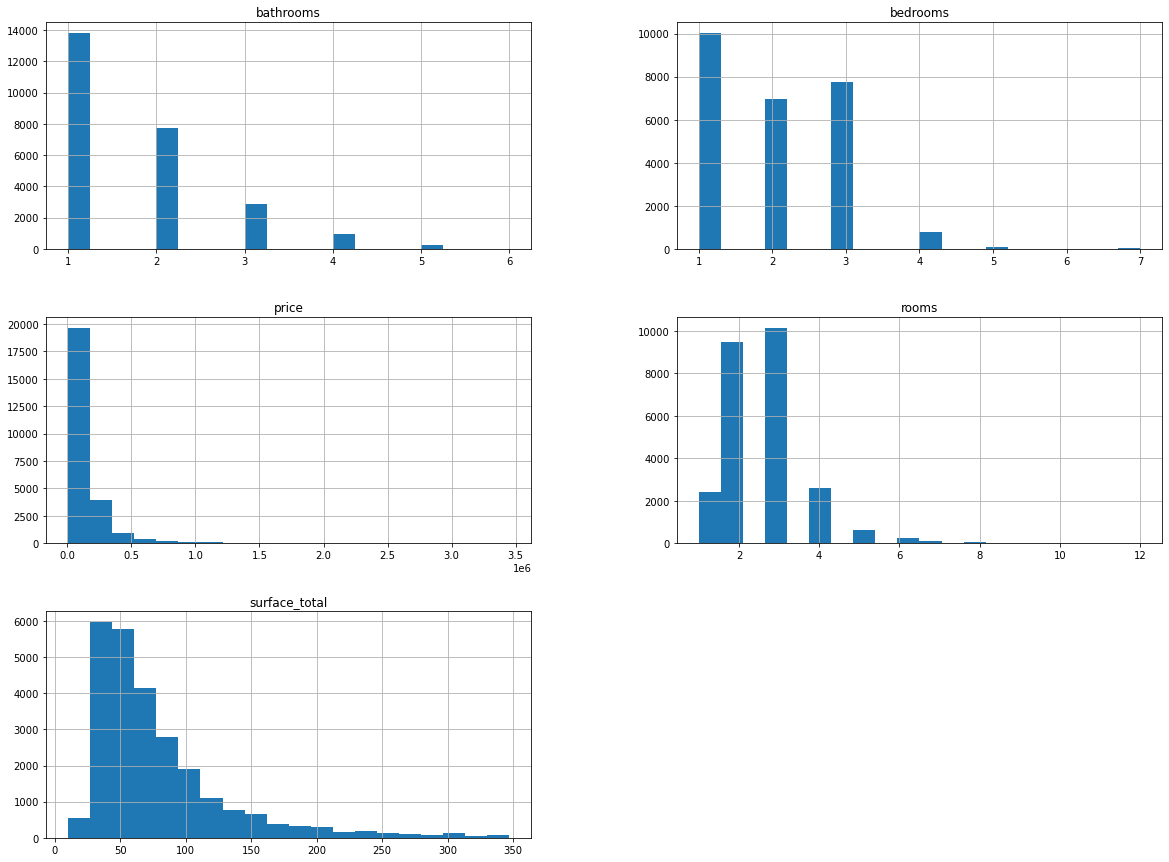

In [23]:
%matplotlib inline
train_set.hist(bins = 20, figsize = (20,15))
plt.show()

In [24]:
corr_matrix = train_set.corr()
corr_matrix['price']

rooms            0.430070
bedrooms         0.300356
bathrooms        0.405673
surface_total    0.664942
price            1.000000
Name: price, dtype: float64

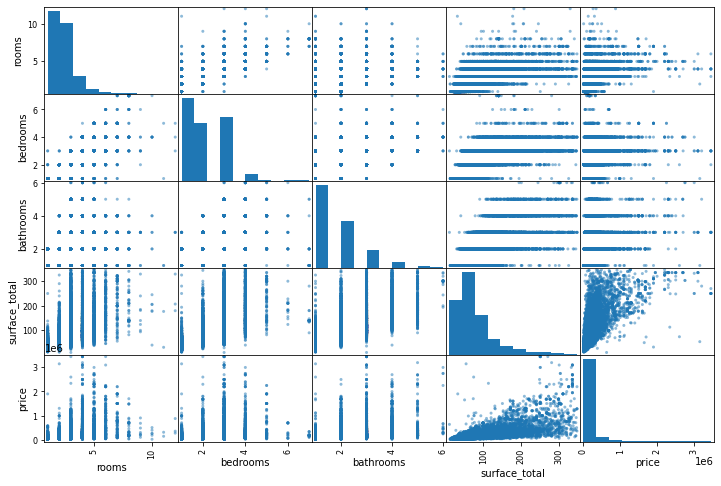

In [25]:
from pandas.plotting import scatter_matrix
attributes = ['rooms', 'bedrooms', 'bathrooms', 'surface_total', 'price']
scatter_matrix(train_set[attributes], figsize=(12, 8));

Vemos que el precio aumenta con la superficie de forma mas marcada en arg que en col.
los picos y valles pueden ser por la zona

C:\Users\desar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


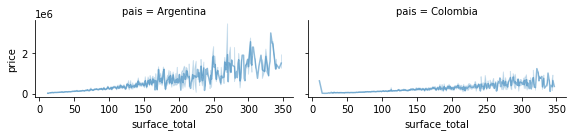

In [26]:
grid = sns.FacetGrid(train_set, col='pais', size=2.0, aspect=2.0)
grid.map(sns.lineplot, 'surface_total', 'price', alpha=.5)
grid.add_legend();

Vemos el precio en funcion de la zona

Segun el count de casas por departamento, vemos que casi todo esta en baires y Cundinamarca

In [27]:
train_set[['provincia_departamento', 'price']].groupby(['provincia_departamento']).mean().sort_values(
                                                                                        by = 'price', ascending = False)

,price
provincia_departamento,
Capital Federal,239222.936541
Cundinamarca,192389.507701
Bolívar,189083.651163
Magdalena,176218.333333
Bs.As. G.B.A. Zona Norte,172537.287417
Neuquén,154503.715847
Chubut,143750.000000
Misiones,136307.692308
Río Negro,128520.778846


In [28]:
train_set[['provincia_departamento', 'price']].groupby(['provincia_departamento']).count().sort_values(
                                                                                        by = 'price', ascending = False)

,price
provincia_departamento,
Capital Federal,8998
Cundinamarca,3376
Buenos Aires Costa Atlántica,1964
Santa Fe,1919
Valle del Cauca,1762
Antioquia,1736
Bs.As. G.B.A. Zona Norte,1510
Atlántico,1456
Bs.As. G.B.A. Zona Sur,795


C:\Users\desar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\desar\Anaconda3\lib\site-packages\seaborn\axisgrid.py:723: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


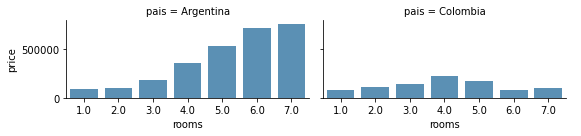

In [29]:
grid = sns.FacetGrid(train_set, col='pais', size=2.0, aspect=2.0)
grid.map(sns.barplot, 'rooms', 'price', alpha=.8, ci = None)
grid.add_legend();

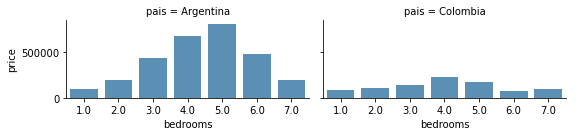

In [30]:
grid = sns.FacetGrid(train_set, col='pais', size=2.0, aspect=2.0)
grid.map(sns.barplot, 'bedrooms', 'price', alpha=.8, ci = None)
grid.add_legend();

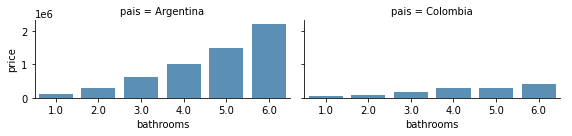

In [31]:
grid = sns.FacetGrid(train_set, col='pais', size=2.0, aspect=2.0)
grid.add_legend();
grid.map(sns.barplot, 'bathrooms', 'price', alpha=.8, ci = None)

# Feature engineering & Preprocessing

Feature provincia_departamento

Creamos una feature one hot que diga si es caba o no, y otra para cundinamarca
Y por ultimo otra que diga si pertenece a los 11 mas poblados o no (tomo 11 y no 10 porque asi incluye BA interior)

Features de rooms

Vemos que el precio baja a medida que aumenta el tamano de la casa, 
eso se puede deber a que casas mas grandes estan en zonas mas baratas y con mas espacio
en zonas caras son mas chicas
podemos hacer un feature que combine zona con tamano
tamb podemos hacer un feature que combine cant de rooms por bedroom y bathroom y ver como se correlaciona

Es posible que haya muy pocas casas de muchos cuartos y eso sea un bias al momento de tomarlas como referencia

investigamos eso

In [32]:
x = train_set['rooms'].value_counts()
y = train_set['bedrooms'].value_counts()
z = train_set['bathrooms'].value_counts()
pd.concat([x,y,z], axis = 1)

,rooms,bedrooms,bathrooms
1.0,2422,10021.0,13807.0
2.0,9474,6984.0,7732.0
3.0,10153,7746.0,2878.0
4.0,2599,777.0,966.0
5.0,609,93.0,258.0
6.0,242,16.0,19.0
7.0,95,23.0,NaN
8.0,47,NaN,NaN
9.0,8,NaN,NaN
10.0,6,NaN,NaN


sacamos la cantidad de rooms por bedroom y vemos si se corr con el precio

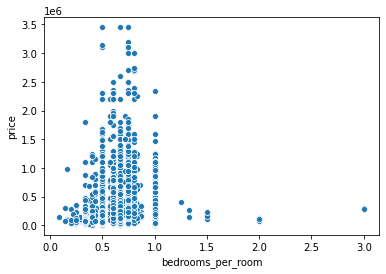

In [33]:
train_set['bedrooms_per_room'] = train_set['bedrooms'] /  train_set['rooms']
sns.scatterplot(x = train_set['bedrooms_per_room'], y = train_set['price'], ci = None);

Y de bathrooms per room

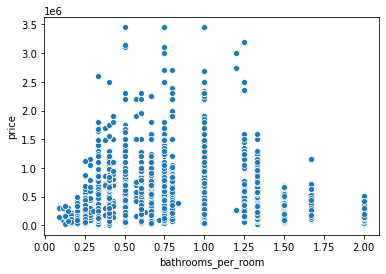

In [34]:
train_set['bathrooms_per_room'] = train_set['bathrooms'] /  train_set['rooms']
sns.scatterplot(x = train_set['bathrooms_per_room'], y = train_set['price'], ci = None);

Vemos tambien ambientes totales

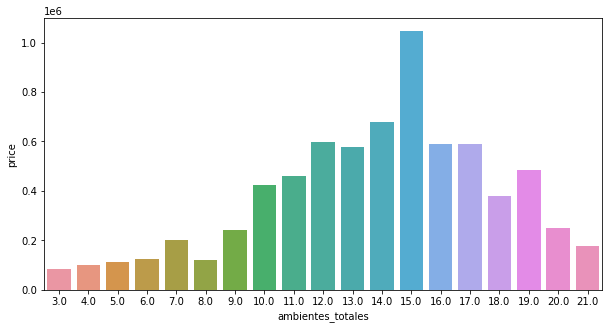

In [35]:
train_set['ambientes_totales'] = train_set['bathrooms'] +  train_set['rooms'] + train_set['bedrooms']
plt.figure(figsize = (10,5));
sns.barplot(x = train_set['ambientes_totales'], y = train_set['price'], ci = None)

In [36]:
corr_matrix_new = train_set.corr()
corr_matrix_new['price']

rooms                 0.430070
bedrooms              0.300356
bathrooms             0.405673
surface_total         0.664942
price                 1.000000
bedrooms_per_room    -0.037600
bathrooms_per_room    0.076160
ambientes_totales     0.438155
Name: price, dtype: float64

el dato de ambientes totales suma claramente.. el $$ llega a una maximo y despues empieza a restar por el tema de las zonas
El resto parecen no tener nada que ver.. mal interpretado el dato para sacar esas variables.. las descarto

In [37]:
train_set.drop(['bathrooms_per_room', 'bedrooms_per_room'], axis = 1, inplace = True)

#y creo la feature en el test set tambien

test_set['ambientes_totales'] = test_set['bathrooms'] +  test_set['rooms'] + test_set['bedrooms']

In [38]:
pd.crosstab(train_set['rooms'], train_set['bedrooms'])

#No me dice mucho esta informacion

bedrooms,1.0,2.0,3.0,4.0,5.0,6.0,7.0
rooms,,,,,,,
1.0,2416,4,2,0,0,0,0
2.0,7276,2195,3,0,0,0,0
3.0,255,4282,5613,3,0,0,0
4.0,51,404,1682,461,1,0,0
5.0,17,73,277,209,33,0,0
6.0,3,20,129,58,26,6,0
7.0,2,5,28,24,29,3,4
8.0,0,0,7,14,2,6,18
9.0,0,1,4,2,0,1,0


a rooms y bedrooms les hacemos un mapping clasificando entre 1 y 2, 3 a 5, y mas de 5.
a bathrooms la dejo como esta porque es posta muy lineal la correlacion
a ambientes totales tambien lo mapeo para escalarlo al resto de las features, ademas de que no es lineal su corr

In [39]:
mapping_rooms = {1.0: 0, 2.0: 0, 3.0: 1, 4.0: 2, 5.0: 3, 6.0: 3, 7.0: 3, 8.0: 3,
                 9.0: 3, 10: 3, 11: 3, 12: 3}
mapping_bedrooms = {1.0: 0, 2.0: 0, 3.0: 1, 4.0: 1, 5.0: 2, 6.0: 3, 7.0: 3}
mapping_ambientes = {1.0: 0, 2.0: 0, 3.0: 0, 4.0: 0, 5.0: 0, 6.0: 0, 7.0: 1, 8.0: 1, 
                     9.0: 1, 10: 2, 11: 2, 12: 2,
                     13: 2, 14:2, 15:2, 16: 2, 17:2, 18:3, 19:3, 20:3, 21:3}

for df in [train_set, test_set]:
    df['rooms'] = df['rooms'].map(mapping_rooms)
    df['bedrooms'] = df['bedrooms'].map(mapping_bedrooms)
    df['ambientes_totales'] = df['ambientes_totales'].map(mapping_ambientes)

In [40]:
train_set.corr()['price']

rooms                0.443525
bedrooms             0.252504
bathrooms            0.405673
surface_total        0.664942
price                1.000000
ambientes_totales    0.439950
Name: price, dtype: float64

vemos que la corr de rooms y bedrooms aumenta. 
La de ambientes totales permanece casi igual, pero va ayudar a no overfittear el modelo

Trabajamos sobre la superficie, corto en cuartiles asi saco rangos proporcionales.
busco hacer categorias de superficie.

In [41]:
train_set['rango_superficie'] = pd.qcut(train_set['surface_total'], 7) 
train_set['rango_superficie'].value_counts()

(45.0, 57.0]      3845
(57.0, 70.0]      3818
(9.999, 37.0]     3715
(123.0, 347.0]    3650
(37.0, 45.0]      3643
(88.0, 123.0]     3606
(70.0, 88.0]      3383
Name: rango_superficie, dtype: int64

In [42]:
train_set[['rango_superficie', 'price']].groupby(['rango_superficie']).mean().sort_values(
                                                by='price', ascending = True)

,price
rango_superficie,
"(9.999, 37.0]",73056.707402
"(37.0, 45.0]",89287.835575
"(45.0, 57.0]",103572.439532
"(57.0, 70.0]",108087.902829
"(70.0, 88.0]",144520.877032
"(88.0, 123.0]",185067.012202
"(123.0, 347.0]",462326.296712


Modifico la surface_total en ambos sets

In [44]:
for df in [train_set,test_set]:
    df.loc[df['surface_total'] <= 37, 'surface_total'] = 0
    df.loc[(df['surface_total'] > 37) & (df['surface_total'] <= 45), 'surface_total'] = 1
    df.loc[(df['surface_total'] > 45) & (df['surface_total'] <= 57), 'surface_total'] = 2
    df.loc[(df['surface_total'] > 57) & (df['surface_total'] <= 70), 'surface_total'] = 3
    df.loc[(df['surface_total'] > 70) & (df['surface_total'] <= 88), 'surface_total'] = 4
    df.loc[(df['surface_total'] > 88) & (df['surface_total'] <= 123), 'surface_total'] = 5        
    df.loc[df['surface_total'] > 123, 'surface_total'] = 6
    df['surface_total'] = df['surface_total'].astype(int)

train_set.drop('rango_superficie', axis = 1, inplace = True)    
train_set.tail(10)    

,pais,provincia_departamento,ciudad,rooms,bedrooms,bathrooms,surface_total,price,ambientes_totales
Id,,,,,,,,,
25650,Colombia,Atlántico,Barranquilla,1,1,4.0,6,225709.0,2
25651,Argentina,Bs.As. G.B.A. Zona Oeste,Ituzaingó,1,0,2.0,5,180000.0,1
25652,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,0,0,1.0,2,200000.0,0
25653,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,0,0,1.0,1,85900.0,0
25654,Argentina,Capital Federal,Belgrano,3,2,4.0,6,1500000.0,2
25655,Colombia,Antioquia,Bello,1,1,2.0,3,41288.0,1
25656,Argentina,Capital Federal,Caballito,0,0,1.0,1,85000.0,0
25657,Argentina,Capital Federal,Villa del Parque,0,0,1.0,3,185700.0,0
25658,Argentina,Capital Federal,San Cristobal,1,0,1.0,2,120000.0,0


si bien precio por superficie ya me tira info de la ciudad, todavia no la dropeo porque me va 
a servir para modificar le test set

para el pais, hacemos un mapping sencillo, para que el modelo permita el input

In [45]:
mapping_pais = {'Argentina': 0, 'Colombia': 1}
for df in [train_set, test_set]:
    df['pais'] = df['pais'].map(mapping_pais)
train_set.head(2)    

,pais,provincia_departamento,ciudad,rooms,bedrooms,bathrooms,surface_total,price,ambientes_totales
Id,,,,,,,,,
0,0,Capital Federal,Villa Crespo,0,0,1.0,0,85000.0,0
1,0,Capital Federal,Palermo,3,1,4.0,6,1590000.0,2


Si bien en una sola liena de codigo puedo sacar los Nana, uso la funcion que ya habia creado para otro proyecto...

In [46]:
def get_nans(df):
    """cuenta y clasifica los NaNs en un df"""
    cols_with_nan = [col for col in df.columns if df[col].isnull().any()]
    nan_cols = {}
    for col in cols_with_nan:
        count = df[col].isna().sum()
        nan_cols[col] = count
    print(nan_cols)

get_nans(test_set) 

{'bedrooms': 2, 'ambientes_totales': 1}


Se ve que el mapping se le escaparon valores del test set que no estan en el train set..
Los filleo

In [47]:
test_set['bedrooms'].fillna(3, inplace = True)
test_set['ambientes_totales'].fillna(3, inplace = True)
get_nans(test_set) 
#ahora si

{}


In [48]:
for df in [train_set, test_set]:
    df['rooms'] = df['rooms'].astype('int')
    df['bedrooms'] = df['bedrooms'].astype('int')
    df['bathrooms'] = df['bathrooms'].astype('int')
    df['ambientes_totales'] = df['ambientes_totales'].astype('int')
train_set.head()

,pais,provincia_departamento,ciudad,rooms,bedrooms,bathrooms,surface_total,price,ambientes_totales
Id,,,,,,,,,
0,0,Capital Federal,Villa Crespo,0,0,1,0,85000.0,0
1,0,Capital Federal,Palermo,3,1,4,6,1590000.0,2
2,1,Atlántico,Barranquilla,1,1,3,5,85329.0,1
3,1,Valle del Cauca,Cali,1,1,1,3,22846.0,1
4,0,Capital Federal,Balvanera,1,0,1,1,80000.0,0


In [53]:
from sklearn.preprocessing import OneHotEncoder

train_set_oh = train_set.copy()
test_set_oh = train_set.copy()

ohe_cols = ['provincia_departamento', 'ciudad']

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)

#el OH encoder me crea un df con las cols encodeadas
OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_set[ohe_cols]))
OH_cols_test = pd.DataFrame(OH_encoder.transform(test_set[ohe_cols]))

#restablezco los index que se borraron por el OH encoding
OH_cols_train.index = train_set.index
OH_cols_test.index = test_set.index

#elimino las cols con var nominales

train_set_drop = train_set.drop(ohe_cols, axis=1)
test_set_drop = test_set.drop(ohe_cols, axis=1)

#y appendo las nuevas

train_set_oh = pd.concat([train_set_drop, OH_cols_train], axis = 1)
test_set_oh = pd.concat([test_set_drop, OH_cols_test], axis = 1)

In [60]:
train_set_oh.head()

train_set = train_set_oh
test_set = test_set_oh

In [61]:
y = train_set['price']
X = train_set.drop('price', axis = 1)
X.head()

,pais,rooms,bedrooms,bathrooms,surface_total,ambientes_totales,0,1,2,3,...,273,274,275,276,277,278,279,280,281,282
Id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,3,1,4,6,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,1,3,5,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,1,1,3,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,1,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [62]:
X.head()

,pais,rooms,bedrooms,bathrooms,surface_total,ambientes_totales,0,1,2,3,...,273,274,275,276,277,278,279,280,281,282
Id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,1,0,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,3,1,4,6,2,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,1,1,3,5,1,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,1,1,1,3,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,1,0,1,1,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
test_set.head(1)

,pais,rooms,bedrooms,bathrooms,surface_total,ambientes_totales,0,1,2,3,...,273,274,275,276,277,278,279,280,281,282
Id,,,,,,,,,,,,,,,,,,,,,
25660,0,1,0,1,3,0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Modelos

In [64]:
# machine learning
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [65]:
#Linear Regressor

linreg = LinearRegression()
reg_model = linreg.fit(X,y)
scores = -1 * cross_val_score(reg_model, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
print('Score: ', scores.mean())

Score:  175701211520484.0


Es esperable que la linreg performe mal si son casi todas features OH. 
Algoritmos de arboles seguro funcionen mejor

In [67]:
#Stochastic gradient descent

sgdreg = SGDRegressor(max_iter = 1000, tol = 1e-3, penalty = None, eta0 = 0.01)
sgd_model = sgdreg.fit(X,y)
scores = -1 * cross_val_score(sgd_model, X, y, cv = 5, scoring = 'neg_mean_absolute_error')
print('Score: ', scores.mean())

Score:  77165.07947379346


In [68]:
knn_model = KNeighborsRegressor(n_neighbors = 3)
knn_model.fit(X, y)
scores = -1 * cross_val_score(knn_model, X, y, cv = 3, scoring = 'neg_mean_absolute_error')
print('Score: ', scores.mean())

Score:  47766.07702711493


In [70]:
# Decision Tree

decision_tree = DecisionTreeRegressor(max_depth = 50, max_leaf_nodes = 500)
tree_model = decision_tree.fit(X, y)
scores = -1 * cross_val_score(tree_model, X, y, cv = 3, scoring = 'neg_mean_absolute_error')
print('Score: ', scores.mean())

Score:  43879.811600726964


In [71]:
#random forest

forest_model = RandomForestRegressor(n_estimators = 50, random_state = 0)
forest_model.fit(X,y)
scores = -1 * cross_val_score(tree_model, X, y, cv = 3, scoring = 'neg_mean_absolute_error')
print('Score: ', scores.mean())

Score:  43665.26153959747


In [72]:
#son medio gigantes los scores..veo de mejorarlo un poco al random forest
from sklearn.model_selection import GridSearchCV

param_grid = [
            {'n_estimators': [3, 50, 100], 'max_features': [2, 6, 8, 10]},
            {'bootstrap': [False], 'n_estimators': [3, 30, 100], 'max_features': [2, 6, 8]},
            ]

forest_reg = RandomForestRegressor(random_state = 0)
grid_search = GridSearchCV(forest_reg, param_grid, cv=3,
                            scoring='neg_mean_squared_error',
                            return_train_score=True)
grid_search.fit(X, y)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=0),
             param_grid=[{'max_features': [2, 6, 8, 10],
                          'n_estimators': [3, 50, 100]},
                         {'bootstrap': [False], 'max_features': [2, 6, 8],
                          'n_estimators': [3, 30, 100]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [73]:
grid_search.best_params_

{'max_features': 2, 'n_estimators': 100}

In [74]:
forest_model = RandomForestRegressor(n_estimators = 100, max_features = 2, random_state = 0)
forest_model.fit(X,y)
predictions = forest_model.predict(test_set)
scores = -1 * cross_val_score(tree_model, X, y, cv = 3, scoring = 'neg_mean_absolute_error')
print('Score: ', scores.mean())

Score:  43660.94022087441


In [75]:
#para ver si overfitteo o undefitteo saco el mse sobre todo el train set
from sklearn.metrics import mean_absolute_error

forest_preds_train = forest_model.predict(X)
mse = mean_absolute_error(y,forest_preds_train)
mse

#no esta tan overfitteado

36931.922715422

In [77]:
!pip install xgboost

In [78]:
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y, random_state = 0)

xgboost_model = XGBRegressor(n_estimators=100, learning_rate=0.05, n_jobs=-1)
xgboost_model.fit(X_train, y_train, 
             early_stopping_rounds=5, 
             eval_set=[(X_valid, y_valid)], 
             verbose=False)


scores = -1 * cross_val_score(xgboost_model, X, y, cv = 3, scoring = 'neg_mean_absolute_error')
print('Score: ', scores.mean())

Score:  44526.60689737698


El random forest es el mejor modelo, hago las predicciones con ese

In [82]:
predictions = forest_model.predict(test_set)

In [83]:
submission = pd.DataFrame({
        "id": test_set.index,
        "price": predictions})

submission.to_csv('submission.csv', index = False )

In [84]:
print(submission.shape, test_set.shape) 

(6416, 2) (6416, 289)
